In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data=pd.read_csv('Add_sales_data_2018.csv')

In [4]:
data

,Date,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands),Profit(in Thousands)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4093.065
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,4042.448
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,4213.819
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,4391.665
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,4350.683
...,...,...,...,...,...,...,...
200,2017-12-14,288.00,288.25,279.20,284.50,284.30,5374.105
201,2017-12-13,290.00,292.50,282.20,284.80,284.45,5439.655
202,2017-12-12,298.60,298.60,286.65,287.45,287.80,5545.013
203,2017-12-11,290.00,299.55,285.90,297.85,298.35,5565.444


In [5]:
# Checking for null values in the dataset
data.isnull().sum()

Date                    0
Add1(in Thousands)      0
Add2(in Thousands)      0
Add3(in Thousands)      0
Add4(in Thousands)      0
Add5(in Thousands)      0
Profit(in Thousands)    0
dtype: int64

Conclusion:- There is no null values present in the dataset

In [6]:
# Statistics of the dataset given
data.describe()

,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands),Profit(in Thousands)
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,267.577561,271.722439,262.990732,267.223902,267.152683,5059.630234
std,26.219588,25.914939,26.126704,26.238832,26.215360,486.910414
min,208.000000,218.600000,205.900000,210.250000,209.200000,4042.448000
25%,244.000000,248.500000,240.300000,243.050000,243.000000,4617.695000
50%,269.700000,274.200000,263.250000,268.900000,268.350000,5088.455000
75%,284.400000,288.800000,280.900000,284.500000,284.450000,5387.438000
max,327.700000,328.750000,321.650000,325.950000,325.750000,6137.800000


# 1.)  Checking the relationship between the amount spent for advertising through five different companies and profit generated

C:\Users\Thinkpad\anaconda3\lib\site-packages\seaborn\matrix.py:308: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  mesh = ax.pcolormesh(self.plot_data, cmap=self.cmap, **kws)


<AxesSubplot:>

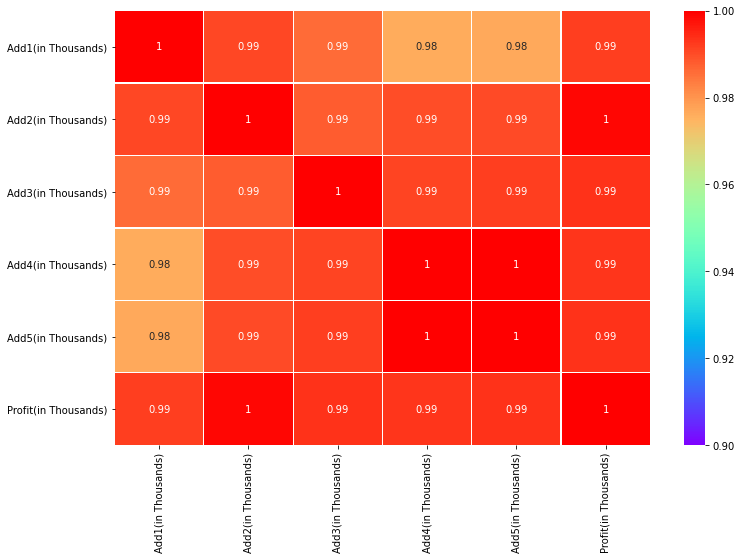

In [7]:
cor_matrix=data.corr()
plt.subplots(figsize=(12,8))
sns.heatmap(cor_matrix,vmin=0.9,annot=True,Linewidth=.1,cmap='rainbow')

conclusion:- There exists high correlation between advertising expenditure through five companies and the profit generated. Among them, expenditure through 'Add2' advertising company is mostly correlated with the profit.

# 2.)  Build a regression model to predict the profit from the given data

##      -spliting data into dependent and independent variables

In [8]:
x=data.drop(['Date','Profit(in Thousands)'],axis=1)#independent variable is the expenditure through 5 different advertising companies
y=data['Profit(in Thousands)']#dependent variable is the profit generated

## -splitting data into train set and test set

In [9]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=.30)
#random_state helps to produce the same results across a different run
#test_size is the size of data used for testing(here taken 30%)

## -building linear regression model and finding the predicted value using the model

In [10]:
from sklearn import linear_model
lr=linear_model.LinearRegression()#finding linear regression of the data and assigning it to lr
model=lr.fit(x_train,y_train)#creating the model using train data set
pred=model.predict(x_test)#finding the model predicted value for x_test
print(pred)

[4152.066 4446.441 5131.898 4907.56  5004.282 4623.793 5384.175 5328.025
 5175.051 5956.323 5780.799 4997.719 5075.858 5784.54  4936.12  5065.652
 4190.965 5034.726 5015.536 5134.657 5145.131 5421.94  4569.293 4598.292
 4436.321 4175.677 5616.791 5667.25  4648.834 5717.838 5001.615 5182.368
 5017.503 5545.013 5013.207 5030.451 5108.626 4760.877 4606.34  4925.861
 5250.788 5038.222 5491.792 5019.997 4647.356 4486.38  4435.174 5300.437
 5425.19  4482.183 4193.095 6062.457 4887.296 5805.521 4705.198 4404.686
 5465.277 4947.72  5185.639 5225.14  5111.806 5518.561]


## -evaluating the model 

In [12]:
from sklearn.metrics import mean_squared_error
print('Mean Squared Error (MSE): ',mean_squared_error(y_test,pred))
print('Route Mean Squared Error (RMSE): ',np.sqrt(mean_squared_error(y_test,pred)))

Mean Squared Error (MSE):  1.2541125416126549e-24
Route Mean Squared Error (RMSE):  1.1198716630099428e-12


In [13]:
from sklearn.metrics import r2_score
print('R squared value is :',r2_score(y_test,pred))

R squared value is : 1.0


MSE and RMSE is close to zero. Also, R squared value is 1. We can conclude that the model is a perfect fit.

In [15]:
print('Efficiency is :',(sum(pred)/sum(y_test))*100)
print('coeffiecients of the model is :',model.coef_)
print('Intercept of the model is :',model.intercept_)

Efficiency is : 99.99999999999997
coeffiecients of the model is : [ 1.   12.38  3.5   1.    0.9 ]
Intercept of the model is : -1.8189894035458565e-12


# 3.) Predict the profit generated by the company, if they wish to spend the following amount for advertisement.
Add1(in Thousands) 290
Add2(in Thousands) 312
Add3(in Thousands) 309
Add4(in Thousands) 298
Add5(in Thousands) 320

In [16]:
new_sample=[[290,312,309,298,320]]#giving the sample value
profit=model.predict(new_sample)#predicting the profit for the sample value
profit

array([5820.06])

profit generated by the company as per the new sample value using the model is 5820.06(in thousands)